## Welcome
just going through some of the interactive stuff for the time being

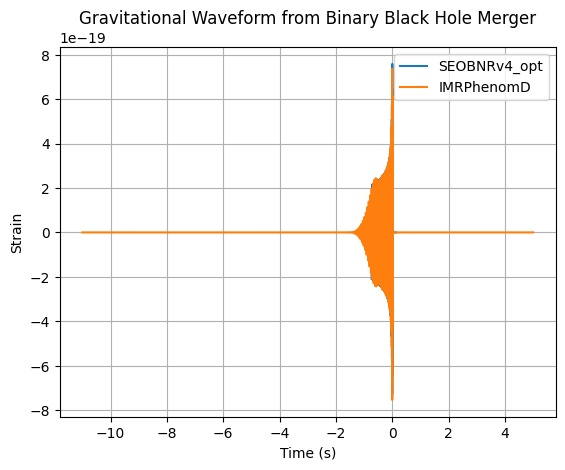

In [2]:
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform


import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

for model in ["SEOBNRv4_opt", "IMRPhenomD"]:
    hp, hc = get_td_waveform(approximant=model,
                             mass1=36,
                             mass2=29,
                             delta_t=1.0/4096,
                             f_lower=20)

    plt.plot(hp.sample_times, hp, label=model)

plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.title("Gravitational Waveform from Binary Black Hole Merger")
plt.legend()
plt.grid()
plt.show()

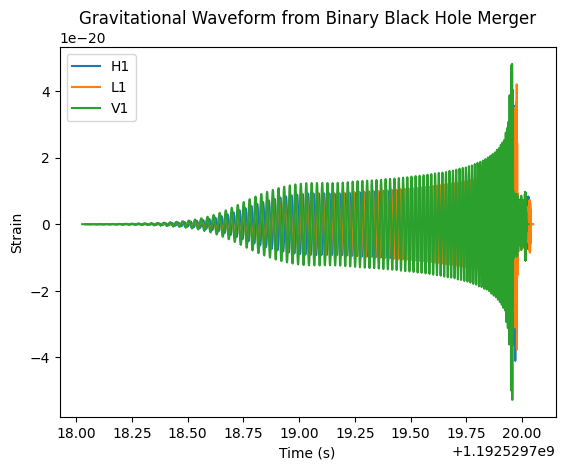

In [3]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform



apx = "IMRPhenomXP"
hp, hc = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/4096,
                         f_lower=40)

end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')

signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)

plt.plot(signal_h1.sample_times, signal_h1, label='H1')
plt.plot(signal_l1.sample_times, signal_l1, label='L1')
plt.plot(signal_v1.sample_times, signal_v1, label='V1')

plt.title("Gravitational Waveform from Binary Black Hole Merger")
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()